In [12]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

#### Types of Missing values

##### 1. Values can be missing at Random positions: This means that the missing values and the corresponding features donot have any   relationship within themselves

##### 2. Values not missing at random: This refers to the missing values and the corresponding features do have a pattern or relationship within.

### Techniques for Missing values treatment:

##### 1. Mean / Median / Mode Value Imputation
##### 2. Random Sample Imputation
##### 3. Use NaN value with new feature
##### 4. End of Distribution Imputation
##### 5. Arbitrary Imputation
##### 6. Frequent Category Imputation

### 1. Mean / Median / Mode Value Imputation

###### When we have a use case where the missing values are at Random i.e. the missing values donot have any direct dependecy with missing values of other features

In [13]:
df = pd.read_excel(r"C:\Users\91983\Desktop\Machine Learning\Wipro TopGear\Python for Data Science L1 Hands On\titanic.xlsm", usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
# Let's check the percentage of missing values in each column:

for i in df.columns:
    print(f"% of missing values in {i}: {round(df[i].isnull().mean()*100,2)}%")

% of missing values in Survived: 0.0%
% of missing values in Age: 19.87%
% of missing values in Fare: 0.0%


In [15]:
# We need to impute missing values for our Age column
# Let's use Median values in place of the missing values
# Creating a function to implement the above:

def impute_age(df, column, median):
    df[column + "_median"] = df[column].fillna(median)
    

impute_age(df, 'Age', df['Age'].median())
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
# Let's evaluate if the STD of the Age changed after imputation:

print(f"STD before imputation: {df['Age'].std()}")
print(f"STD after imputation: {df['Age_median'].std()}")

STD before imputation: 14.526497332334044
STD after imputation: 13.019696550973194


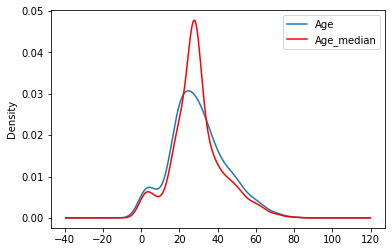

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
plt.legend()

#### Advantages:

##### 1. Easy to implement
##### 2. Robust to outliers
##### 3. Faster way to Implement

#### Disadvantage:

##### 1. Variance / Standard Deviation changes and more data is inclined towards the median
##### 2. Impacts the correlation with other features

### 2. Random Sample Imputation:

###### From the dataset,an observation is choosen randomly and then it replaces the missing value with the observed valued. It is used in situations where we have missing data in random.

In [18]:
# We will re-read the titanic dataset to understand how we can impute missing values using Random Sample Imputation

df = pd.read_excel(r"C:\Users\91983\Desktop\Machine Learning\Wipro TopGear\Python for Data Science L1 Hands On\titanic.xlsm", usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
def impute_nan(df, column, median):
    df[column + "_median"] = df[column].fillna(median)
    
    # Create a separate column to capture the values after random value imputation
    df[column+"_random"] = df[column]
    
    # Capturing random values for NaN values
    # Dropping the NaN values
    # Sampling the column values without NaN values and selecting random values equal to the missing values given by (df[column].isnull().sum())
    random_val = df[column].dropna().sample(df[column].isnull().sum(), random_state = 0)
    
    # Store the index of the NaN values to push to merge with available values
    random_val.index = df[df[column].isnull()].index
    
    # Merging the available values with random values in NaN value indexes
    df.loc[df[column].isnull(), column+"_random"] = random_val

# Using above function to impute our missing values and create new columns with imputed values
impute_nan(df, 'Age', df['Age'].median())

df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


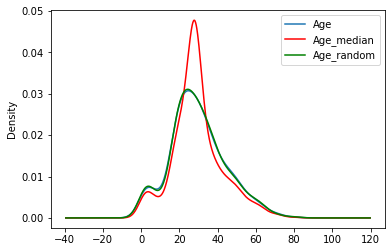

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
plt.legend()

#### Advantages:

##### 1. Easy to implement
##### 2. Less distortion in Variance compared to Mean/Median/Mode imputation

#### Disadvantage:

##### 1. Not applicable in all the situations.

### 3. Capturing NaN values with a new feature:

###### Used when dataset is having missing values which are not random

In [23]:
# We will re-read the titanic dataset to understand how we can impute missing values using New Feature

df = pd.read_excel(r"C:\Users\91983\Desktop\Machine Learning\Wipro TopGear\Python for Data Science L1 Hands On\titanic.xlsm", usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
# Create a new feature that will contain values as 1 where there is NaN in Age column else it will have 0
df['Age_Nan'] = np.where(df['Age'].isnull(),1,0)

df['Age'] = df.fillna(df['Age'].median())

df.head()

,Survived,Age,Fare,Age_Nan
0,0,0.0,7.2500,0
1,1,1.0,71.2833,0
2,1,1.0,7.9250,0
3,1,1.0,53.1000,0
4,0,0.0,8.0500,0


#### Advantages:

##### 1. Easy to implement
##### 2. Captures the importance of Missing values which will be further fed to the machine learning algorithm to draw some conclusion

#### Disadvantage:

##### 1. For many features having NULL values it will create additional features which may lead to curse of dimensionality.

### 4. End of Distribution Imputation:

#### Take the value from the far end of the distribution and replace it with the NaN values


In [26]:
# We will re-read the titanic dataset to understand how we can impute missing values using New Feature

df = pd.read_excel(r"C:\Users\91983\Desktop\Machine Learning\Wipro TopGear\Python for Data Science L1 Hands On\titanic.xlsm", usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


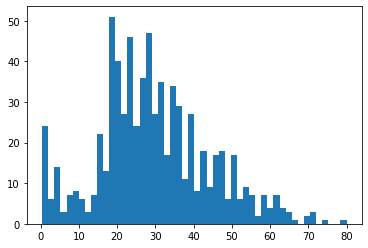

In [30]:
# Checking the distribution of the Age column

plt.hist(df['Age'], bins = 50)
plt.show()

Value limit to 3 STD is: 73.28


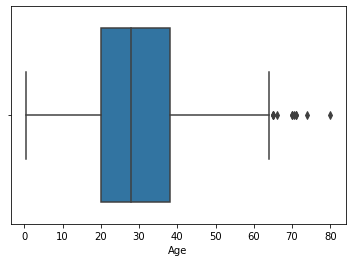

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [35]:
# Capturing the value which is 3 STD far from Mean in a variable which will be used for imputation
extreme = round(df['Age'].mean()+3*df['Age'].std(),2)
print(f"Value limit to 3 STD is: {extreme}")

# Also we will review the values using boxplot
sns.boxplot(data = df, x = 'Age')
plt.show()

# Defining a function to impute NaN values with extreme value and another

def end_of_distribution(df, column, median, extreme):
    df[column+"_end_distribution"] = df[column].fillna(extreme)
    df[column] = df[column].fillna(median)
    
# Impute the missing values and check on the new dataset formed after imputation
end_of_distribution(df, 'Age', df['Age'].median(), extreme)

df.head()

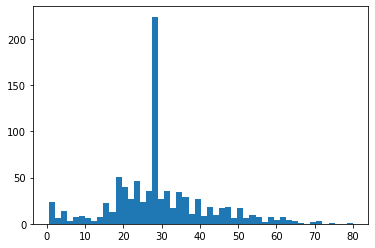

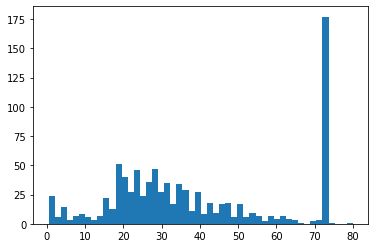

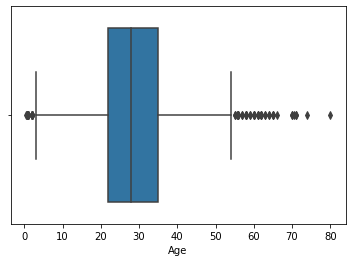

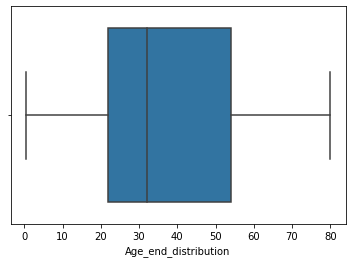

In [36]:
# Compare values of Age after imputation with Median and Extreme values

# Checking the distribution of the Age column after imputation with Median values
plt.hist(df['Age'], bins = 50)
plt.show()

# Checking the distribution of the Age column after imputation with Extreme
plt.hist(df['Age_end_distribution'], bins = 50)
plt.show()

# Checking the outliers of the Age column after imputation with Median values
sns.boxplot(data = df, x = 'Age')
plt.show()

# Checking the outliers of the Age column after imputation with Extreme
sns.boxplot(data = df, x = 'Age_end_distribution')
plt.show()

#### Advantages:

##### 1. Easy to implement
##### 2. Captures the importance of Missing values which will be further fed to the machine learning algorithm to draw some conclusion

#### Disadvantage:

##### 1. Distorts original distribution
##### 2. For huge NaN values, it will replace all with maximum values
##### 3. In case of small NaN values, imputing maximum values may treat it as outliers in further steps of feature engineering

### Arbitrary Imputation

#### Replaces NaN value with an arbitrary value

In [37]:
# We will re-read the titanic dataset to understand how we can impute missing values using New Feature

df = pd.read_excel(r"C:\Users\91983\Desktop\Machine Learning\Wipro TopGear\Python for Data Science L1 Hands On\titanic.xlsm", usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
def impute_nan(df, column):
    
    # Create a column by using the least value 0 as Missing value
    df[column + "_zero"] = df[column].fillna(0)
    
    # Create a column by using the max value 80 as Missing value
    df[column+"_eighty"] = df[column].fillna(80)
    
    
# Using above function to impute our missing values and create new columns with imputed values
impute_nan(df, 'Age')

df.head()

,Survived,Age,Fare,Age_zero,Age_eighty
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


#### Advantages:

##### 1. Easy to implement
##### 2. Captures the importance of Missing values which will be further fed to the machine learning algorithm to draw some conclusion

#### Disadvantage:

##### 1. Distorts original distribution
##### 2. Hard to decide which values to be used